# END TO END DATA SCIENCE PROJECT USING LINEAR REGRESSION

In this project we will go thorugh a full data science pipeline. We will solve a data science project from beginnig to end. 
To solve most of our data science projects we will go through the following steps:
1. Import some liraries like pandas and numpy
2. data cleaning and formatting
3. data analysis through EDA and Visualization
4. select features and targets( called features engineering and selection) 
4. establish a baseline select and select models to train and test
5. evaluate the models and compare their performance
6. Hyperparemeter tuning 
7. Interpret and draw conclusions

In [1]:
# We are going to import some libraries data manipulation and visualization

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Data Cleaning and Formatting

In this step we usually get acustomed to our data. checking for missing values and the data types. The data set we used a very popular data that can be downloaded on UCI Data Science and Machine Learning website. They have a data cience and machine learning repository.

In [2]:
#read data
data = pd.read_csv("auto-mpg.data-original", names=["mpg","cylinders","displacement","horsepower","weight",
 
                                                    "acceleration","model_year","origin", "car_name"], delim_whitespace = True)

# display the first 5 rows
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [3]:
# let's check for the numbers of rows and columns and also check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


There are missing values in the target column we are tryna to predict so we will deal with them later. The data types seem to be correct as well.

# Exploratory Data Analysis

In this, we usually try to visualize our data and find relationships between targets and features. The targets are the values we are trying to predict and the features are the values that will help us make the predictions. You can think of the targets values as the dependent variable since its prediction will depend on the features(our dependent variables). Before I forget the problem we are solving is a Supervised Regression Machine Learning Problem because we  are predicting continuous numerical targets or labels. (can also be called labels!) 

## single variable plot

It is a good habit to look at the distribution of the targets values first since we are a trying to predict them.

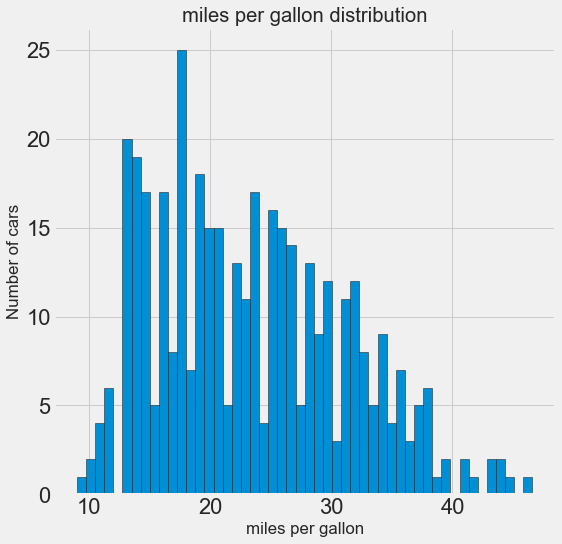

In [4]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data["mpg"].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('miles per gallon'); plt.ylabel('Number of cars'); 
plt.title('miles per gallon distribution');
plt.show()

the visualization shows us some good information about the mpg distribution of cars. most in our dataset have cars have mpg between 15 to 30. Our data is also a little bit skewed right.

Let's have a look at the summary statistics of our data

In [5]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Let's look for relationship in our data

# Looking for Relationship

We want to look for realtionship to make connections between our values. we also want to confirm that the categorical values do not have any impact our targets values(our target values is mpg, just a reminder! :-)). One way to check for realtionship is to use the correlations functions, density plots, and scatter plots, etc.

we want to see if the manufacturer of the car also has a relationship with the mpg (our targets values), so we will create a new column called manufacturer

In [6]:
data["car_name"].value_counts()

ford pinto                    6
amc matador                   5
toyota corolla                5
ford maverick                 5
amc hornet                    4
                             ..
amc ambassador sst            1
datsun 510 (sw)               1
plymouth horizon tc3          1
dodge aries wagon (sw)        1
pontiac j2000 se hatchback    1
Name: car_name, Length: 312, dtype: int64

In [7]:
model=[]
for x in data["car_name"]:
    x = x.split()
    model.append(x[0])

In [8]:
data["manufacturer"] = model

In [9]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,manufacturer
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford


In [10]:
data["manufacturer"].value_counts()

ford             53
chevrolet        44
plymouth         32
amc              29
dodge            28
toyota           25
datsun           23
buick            17
volkswagen       16
pontiac          16
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
vw                6
saab              5
renault           5
subaru            4
opel              4
chevy             3
bmw               2
maxda             2
mercedes-benz     2
cadillac          2
triumph           1
toyouta           1
hi                1
citroen           1
vokswagen         1
chevroelt         1
nissan            1
mercedes          1
capri             1
Name: manufacturer, dtype: int64

In [11]:
# we will only select a few brands

brand = data.dropna(subset =["mpg"])
brand = data['manufacturer'].value_counts()[:4]
brand =list(brand.index)

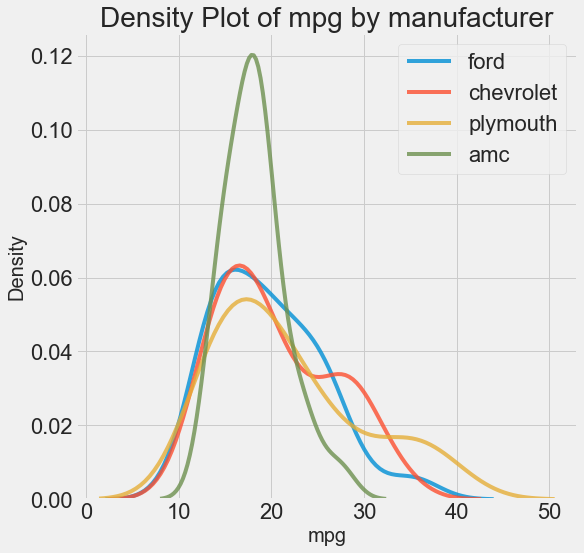

In [12]:
# Plot of distribution of mpg for manufacturer
figsize(8,8)

# Plot each manufacturer
for c_brand in brand:
    # Select the manufacturer
    subset = data[data['manufacturer'] == c_brand]
    
    # Density plot of mpg
    sns.kdeplot(subset['mpg'].dropna(),
               label = c_brand, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('mpg', size = 20)
plt.ylabel('Density', size = 20) 
plt.title('Density Plot of mpg by manufacturer', size = 28)
plt.show()

Based the density plot there are some noticeable differences at the lower end and higher end of the car but, there is still an overlap between Ford, Chevrolet, Plymouth. For now let's assume that the difference is not significant just focus on the numerical values.

## Correlation between our features and targets

To check correlation between numerical values it is a good way to look at the pearson Correaltion. It is important to note that Pearson correlation only try to find linear correlation beteen values. the code below will show the correlation coefficient between the target and variables. This will only check correlation between integer and float values not categorical values!

In [13]:
corr_data = data.corr()
corr_data["mpg"].sort_values(ascending=False)

mpg             1.000000
model_year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

As it can be observed there are several strong correlations between mpg and the other variables. One way to ssee if we can pick up other non linear  is to use a log or sqrt. This code I found online will do just that. It will also change the categorical values into nnumerical values using a well known  technique in data science called one hot encoding.

In [14]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the mpg column
    if col == 'mpg':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data['manufacturer']

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop cars without an mpg
features = features.dropna(subset = ['mpg'])

# Find correlations with the building 
correlations = features.corr()['mpg'].dropna().sort_values()

C:\Users\Kathie\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [15]:
correlations.head(10)

log_weight          -0.843979
sqrt_weight         -0.839742
weight              -0.831741
log_displacement    -0.828392
sqrt_displacement   -0.820815
log_horsepower      -0.817517
displacement        -0.804203
sqrt_horsepower     -0.802311
horsepower          -0.778427
sqrt_cylinders      -0.776141
Name: mpg, dtype: float64

In [16]:
correlations.tail(10)

acceleration         0.420289
sqrt_acceleration    0.427962
log_acceleration     0.433532
origin               0.563450
sqrt_origin          0.569844
log_origin           0.574050
log_model_year       0.575328
sqrt_model_year      0.577336
model_year           0.579267
mpg                  1.000000
Name: mpg, dtype: float64



we can see some changes after we apply the log and sqrt in the correlation calculations. lets visualize some two variables plots

## Two variable plots

In order to visualize the relationship between two variables, we use a scatterplot. We can also include additional variables using aspects such as color of the markers or size of the markers. Here we will plot two numeric variables against one another and use color to represent a third categorical variable.

C:\Users\Kathie\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


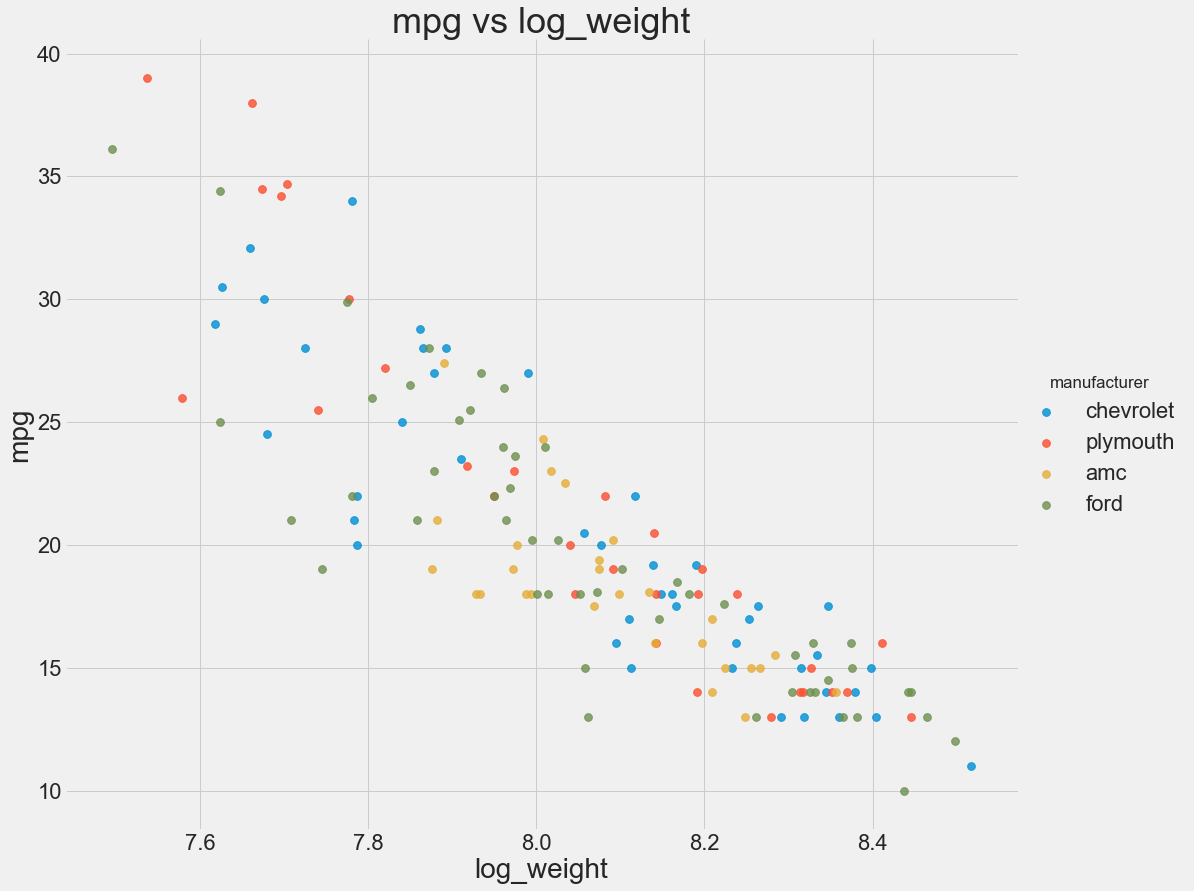

In [17]:
figsize(12, 10)

# Extract the brand
features['manufacturer'] = data.dropna(subset = ['mpg'])['manufacturer']

# Limit to manufacturer satisfying the previous observation
features = features[features['manufacturer'].isin(brand)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('log_weight', 'mpg', 
          hue = 'manufacturer', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("log_weight", size = 28)
plt.ylabel('mpg', size = 28)
plt.title('mpg vs log_weight', size = 36);

there is clearly a negative realtionship between mpg and log_weight

## Pairs plots

We will use pair plots to visualize some pairs correlation in our data set. Obviously the 

C:\Users\Kathie\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


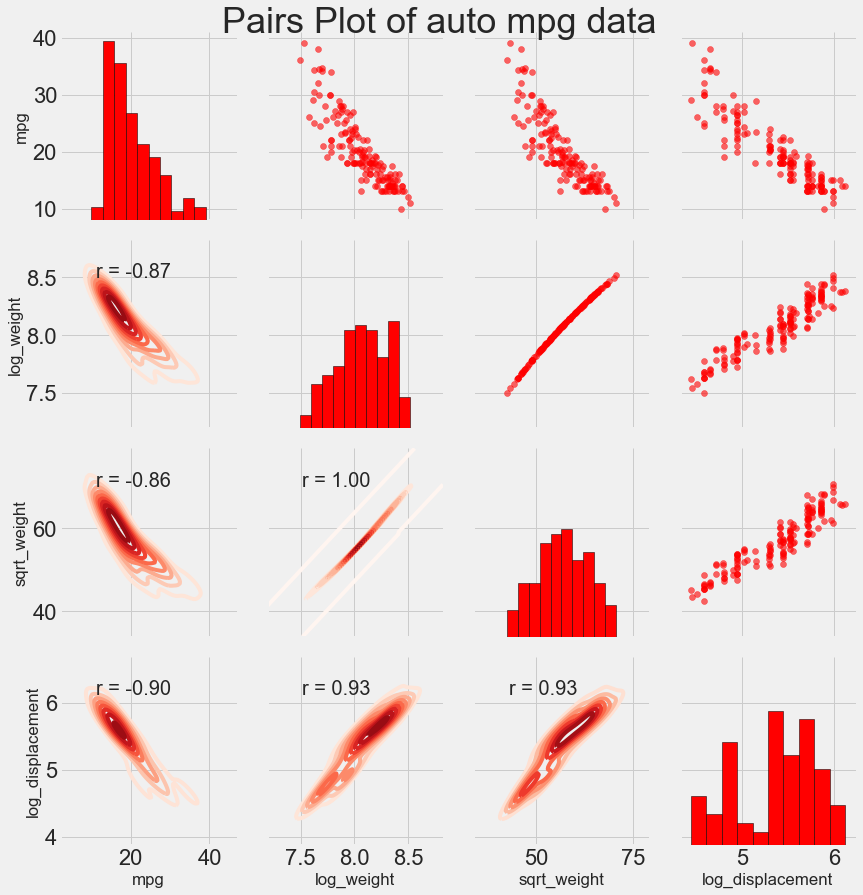

In [18]:
# Extract the columns to  plot
plot_data = features[['mpg', 'log_weight', 
                      'sqrt_weight', 
                      'log_displacement']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of auto mpg data', size = 36, y = 1.02);

As we can observe on these graphs the values are strongly correlated, we also notice that some value are colinear. we are going to deal with those values.

Another way to look at colinear values is to use a heatmap:

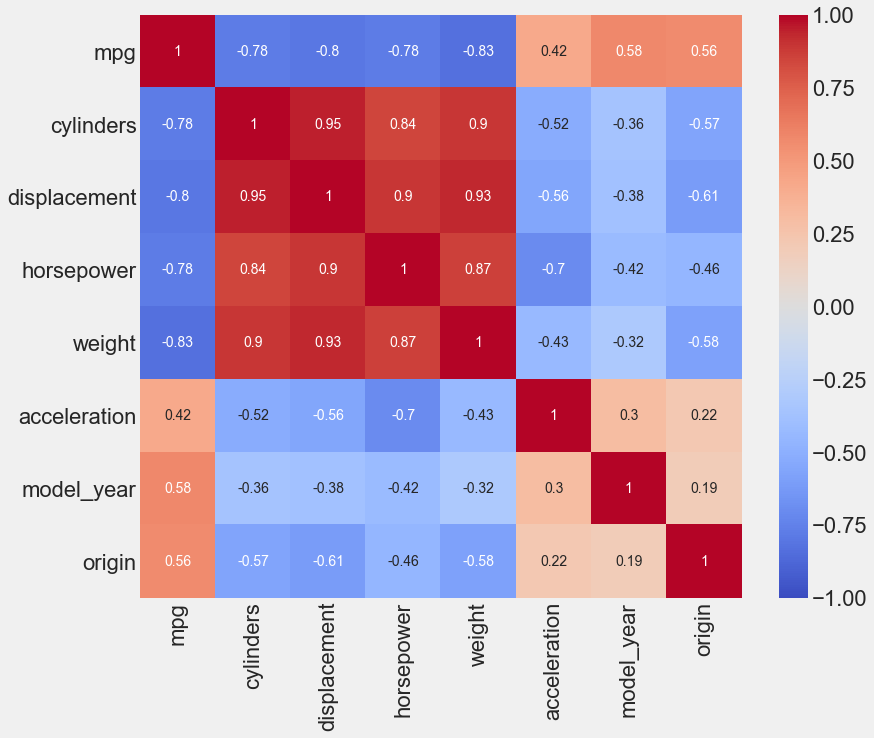

In [19]:
heatmap = sns.heatmap(corr_data, vmin=-1,vmax=1,cmap='coolwarm', annot=True)

That looks more informative!

## Feature Engineering and Selection

In this project we have decided to take the following steps: 

Select only the numerical variables and categorical variable (manufacturer)
Add in the log transformation of the numerical variables
One-hot encode the categorical variable

In [20]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the mpg column
    if col == 'mpg':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data["manufacturer"]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\Kathie\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


(406, 60)

At this point we have 406 rows and 59 columns(without the target values).

## Remove colinear features
Highly colinear features describe the same thing so we only need one of them in our data set.

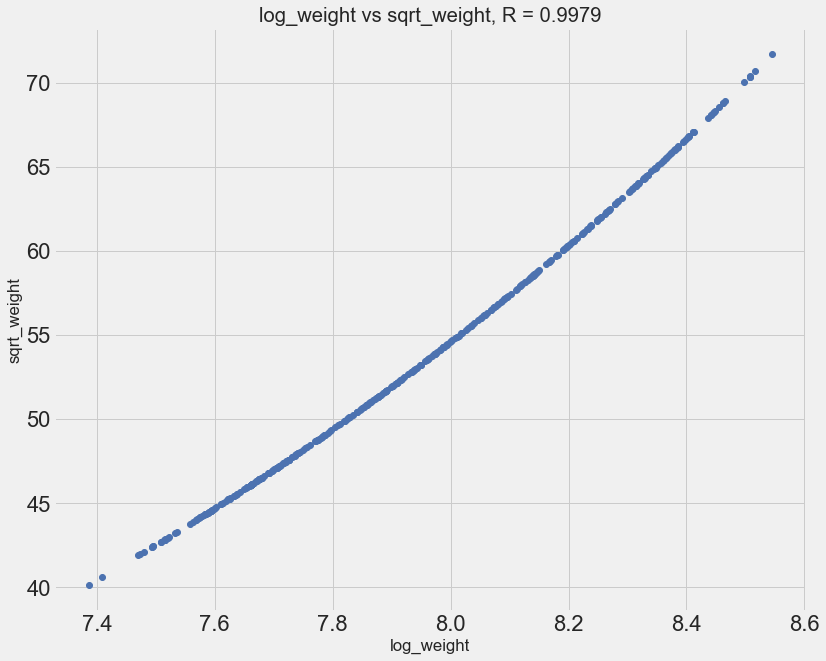

In [21]:
plot_data = features[['log_weight', 'sqrt_weight']].dropna()

plt.plot(plot_data['log_weight'], plot_data['sqrt_weight'], 'bo')
plt.xlabel('log_weight'); plt.ylabel('sqrt_weight')
plt.title('log_weight vs sqrt_weight, R = %0.4f' % np.corrcoef(features[['log_weight', 'sqrt_weight']].dropna(), rowvar=False)[0][1]);

As we can see on this specific plot these two indepedent variables are strongly correlated. we will just need one of the other. 
It is good to be noted that there are a lot ways to reduce the numbers of features. A well used one is PCA. Reader can find more information online.


In [22]:

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between mpg
    y = x['mpg']
    x = x.drop(columns = ['mpg'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)

    # Add the score back in to the data
    x['mpg'] = y
               
    return x

In [23]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

In [24]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(406, 42)

We have now reduced the number of columns from 60 to 42.

## Split Into Training and Testing Sets

We are going to split our data set into training and testing sets

In [25]:
#Extract the buildings with no score and the buildings with a score
no_mpg = features[features['mpg'].isna()]
mpg = features[features['mpg'].notnull()]

print(no_mpg.shape)
print(mpg.shape)

(8, 42)
(398, 42)


In [26]:
# Separate out the features and targets
features = mpg.drop(columns='mpg')
targets = pd.DataFrame(mpg['mpg'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(278, 41)
(120, 41)
(278, 1)
(120, 1)


## Establish a Baseline¶

Since it is import to establish a baseline(which is a naive guess). If our model cannot outperform a naive guess it is probably not good. our metric will be the mean absolute error.

### Root Mean Squared Error

In [27]:
# Function to calculate root mean squared error

def rmse (y_true,y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [28]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % rmse(y_test, baseline_guess))

The baseline guess is a score of 22.15
Baseline Performance on the test set: MAE = 7.7270


This shows our average estimate on the test set is off by about 7.73 points. The next step to replace all the missing value by the median. This process is called imputation 

# Data Preprocessing

In this step we replace all the missing values with median of the columns and normalize all  the columns. 

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(X,y)
X= imputer.transform(X)
X_test= imputer.transform(X_test)

In [30]:
print(np.isnan(X).sum())

0


In [31]:
print(np.isnan(X_test).sum())

0


In [32]:
np.where(~np.isfinite(X))

(array([], dtype=int64), array([], dtype=int64))

In [33]:
np.where(~np.isfinite(X_test))

(array([], dtype=int64), array([], dtype=int64))

It is always a good habit to scale the dataset to  normalize the range of our independent values. Scaling is very import esepcailly for models like KNN neighbors and Support vector Machine that rely on distances

In [34]:
scaler = MinMaxScaler (feature_range=(0,1))
scaler.fit(X,y)
scaler.transform(X)
scaler.transform(X_test)

array([[0.2       , 0.05943152, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.13436693, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.42377261, 0.08333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6       , 0.40568475, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.05943152, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.24547804, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [35]:
y = np.array(y).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))

# Select, Evaluate and compare selected models

It is good habit select and evaluate different models and compare their performance. I always use 6-8 models to test to test and compare. you can choose less! 

In [36]:
def rmse (y_true,y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [37]:
def model_test(model):
    model.fit(X,y)
    predictions = model.predict(X_test)
    model_rsme = rmse(y_test,predictions)
    return model_rsme

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [39]:
lr = LinearRegression()
lr_rsme = model_test(lr)
print(" the root mean squared error for linear regression is:", lr_rsme)

 the root mean squared error for linear regression is: 3.8976820830954613


In [40]:
knn = KNeighborsRegressor(n_neighbors=5)
knn_rsme = model_test(knn)
print(" the root mean squared error for K nearest neighbors is:", knn_rsme)

 the root mean squared error for K nearest neighbors is: 3.171422919342883


In [41]:
svm = SVR()
svm_rsme = model_test(svm)
print(" the root mean squared error for Support vector machine is:", svm_rsme)

 the root mean squared error for Support vector machine is: 4.190438691688523


In [42]:
tree = DecisionTreeRegressor()
tree_rsme = model_test(tree)
print(" the root mean squared error for decision tree is:", tree_rsme)

 the root mean squared error for decision tree is: 3.8240685140305732


In [43]:
xgb = XGBRegressor(objective='reg:squarederror')
xgb_rsme = model_test(xgb)
print(" the root mean squared error for XGB Regressor is:", xgb_rsme)

 the root mean squared error for XGB Regressor is: 2.881204985602304


In [44]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
rf_rsme = model_test(rf)
gb_rsme = model_test(gb)

In [45]:
print(" the root mean squared error for randoom forest is:", rf_rsme)

 the root mean squared error for randoom forest is: 3.0859116108758164


In [46]:
print(" the root mean squared error for gradient boosting is:", gb_rsme)

 the root mean squared error for gradient boosting is: 2.95088455477848


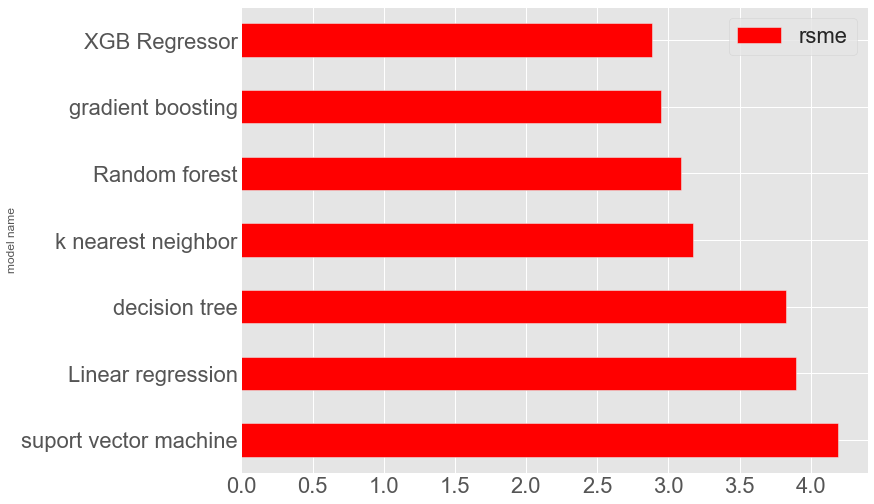

In [47]:
figsize(10,8)

plt.style.use("ggplot")
model_comparison = pd.DataFrame({"model name":["Linear regression", "k nearest neighbor", "suport vector machine",
                                              "decision tree","XGB Regressor", "Random forest", "gradient boosting"],
                                "rsme": [lr_rsme,knn_rsme,svm_rsme,tree_rsme,xgb_rsme,rf_rsme,gb_rsme]})
model_comparison = model_comparison.sort_values("rsme", ascending=False).plot(x="model name", y="rsme", color="red", kind="barh")

The plot above shows us that Linear Xgboost regressor is the best since it gives us the least root mean squared error

# Hyperparameter Tuning

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process --- wikipedia

In [48]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [49]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=xgb,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [51]:
random_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   37.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [52]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [53]:
from sklearn.model_selection import GridSearchCV


trees_grid = {"n_estimators":[100,150,200,250,300,350,400,450],
             }

grid_search = GridSearchCV(estimator=xgb,n_jobs=1,param_grid=trees_grid,
                           scoring="neg_mean_absolute_error",cv=10,verbose=1,return_train_score=True)

In [54]:
grid_search.fit(X,y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   23.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450]},
  

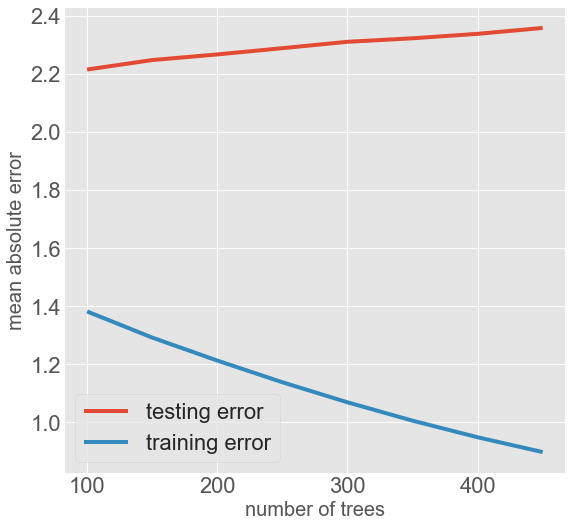

In [55]:
results = pd.DataFrame(grid_search.cv_results_)
figsize(8,8)
plt.style.use("ggplot")
plt.plot(results["param_n_estimators"], -1*results["mean_test_score"], label="testing error")
plt.plot(results["param_n_estimators"], -1*results["mean_train_score"], label="training error")
plt.legend()
plt.ylabel("mean absolute error", size=20)
plt.xlabel("number of trees", size= 20)
plt.show()

The graph clearly shows that our model is clearly overfitting. It performs well on the training that data cannot generalize with new set of data. 

In [56]:
default_model = XGBRegressor(objective='reg:squarederror')
final_model = grid_search.best_estimator_
final_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Let's check the time it takes to train our default XGB regression and the final model 

In [57]:
%%timeit -n 1 -r 5
default_model.fit(X,y)

103 ms ± 4.73 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [58]:
%%timeit -n 1 -r 5
final_model.fit(X,y)

108 ms ± 3.71 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [59]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

In [60]:
print("the default model performance on the test set: rsme = %0.4f"  %rmse(y_test,default_pred))
print("the final model performance on the test set: rsme = %0.4f" %rmse(y_test,final_pred))

the default model performance on the test set: rsme = 2.8812
the final model performance on the test set: rsme = 2.8812


Hyperparameter tuning did not improve the rsme of the model and it takes more time to run a "tuned model". We will obviously use the default.

In the next line we will calculate and plot the error, which is the difference between the predicted values and and the actual values.

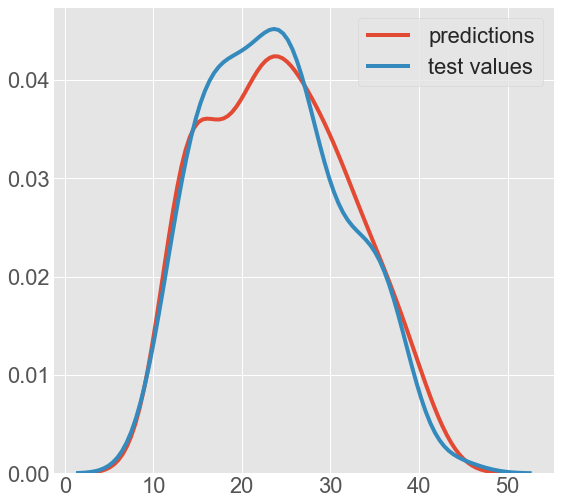

In [61]:

figsize(8,8)
sns.kdeplot(final_pred, label="predictions")
sns.kdeplot(y_test, label="test values")
plt.show()

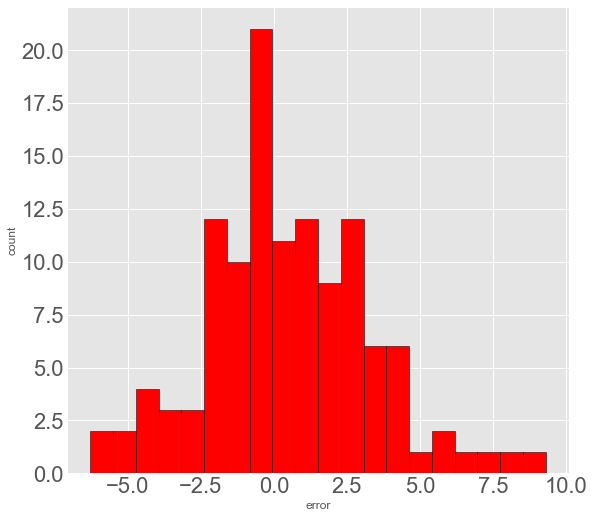

In [62]:
figsize =(6,6)
residuals = final_pred - y_test

plt.hist(residuals, color = "red", bins=20, edgecolor="black")
plt.ylabel("count")
plt.xlabel("error")
plt.show()

In [63]:
sns.scatter(x=final_pred, y=y_test)

AttributeError: module 'seaborn' has no attribute 'scatter'

In [ ]:
predictions_plot = pd.DataFrame({"predicted":final_pred,
                            "actual": y_test})

sns.lmplot('predicted', 'actual',  data = predictions_plot,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = True,
          size = 12, aspect = 1.2)

Although the model we use still overfits, there is a strong correlation between our predicted values and the actual values. 

# Bonus Neural Network

In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense( 50, activation='relu',input_dim = X.shape[1]))

# Adding the second hidden layer
model.add(Dense(25,activation='relu'))

# Adding the third hidden layer
model.add(Dense(50,activation='relu'))
# Adding the output layer
model.add(Dense(1))

# Compiling the ANN
model.compile(loss='mean_squared_error', optimizer='Adamax')

#create monitor
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience=5, verbose=1, mode= "auto")

# Fitting the ANN to the Training set
model_history=model.fit(X,y, callbacks = [monitor], validation_split=0.20, batch_size = 10,nb_epoch = 1000)

In [ ]:
ann_pred = model.predict(X_test)
score = rmse(y_test,ann_pred)

In [ ]:
score

# Conclusions

At the end of this analysis, we can conclude that:
1. The best model to choose based the features is XGB regressor
2. The model still overfits and  does not generalize very well on unseen data
3. there is a strong correlation between predicted values and actual values

we can still make imporvement on our data set by spending more time on selecting or creating new features. we can also choose more than one model for the hyperparameters tuning. 